### Import of all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Create a dataframe

In [2]:
dataframe = pd.read_csv("./diabetes.csv")
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
dataframe.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Missing values in a given dataset

In [5]:
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**As we Can observe 0 for BloodPressure, SkinThickness that does not seems right hence we need to do data imputation**

*   Data Imputation of 0's in every feature

*   Size of the data






In [8]:
dataframe.shape

(768, 9)

In [9]:
dataframe.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
print(dataframe.Outcome.unique())
print(dataframe["Outcome"].unique())

[1 0]
[1 0]


**Observations**

*   Target Column: Outcome[0,1] (Binary Classification Task)
*   As the target column is available in the dataset, supervised machine learning algorithm.
*   Records: 768





## EDA
Correlation Coefficient

In [14]:
# Find featuers whos correlation coeficient is greater than 0.6
dataframe.corr()['Pregnancies']

Pregnancies                 1.000000
Glucose                     0.129459
BloodPressure               0.141282
SkinThickness              -0.081672
Insulin                    -0.073535
BMI                         0.017683
DiabetesPedigreeFunction   -0.033523
Age                         0.544341
Outcome                     0.221898
Name: Pregnancies, dtype: float64

In [15]:
# Find featuers whos correlation coeficient is greater than 0.6
dataframe.corr()['Glucose']

Pregnancies                 0.129459
Glucose                     1.000000
BloodPressure               0.152590
SkinThickness               0.057328
Insulin                     0.331357
BMI                         0.221071
DiabetesPedigreeFunction    0.137337
Age                         0.263514
Outcome                     0.466581
Name: Glucose, dtype: float64

In [18]:
dataframe.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


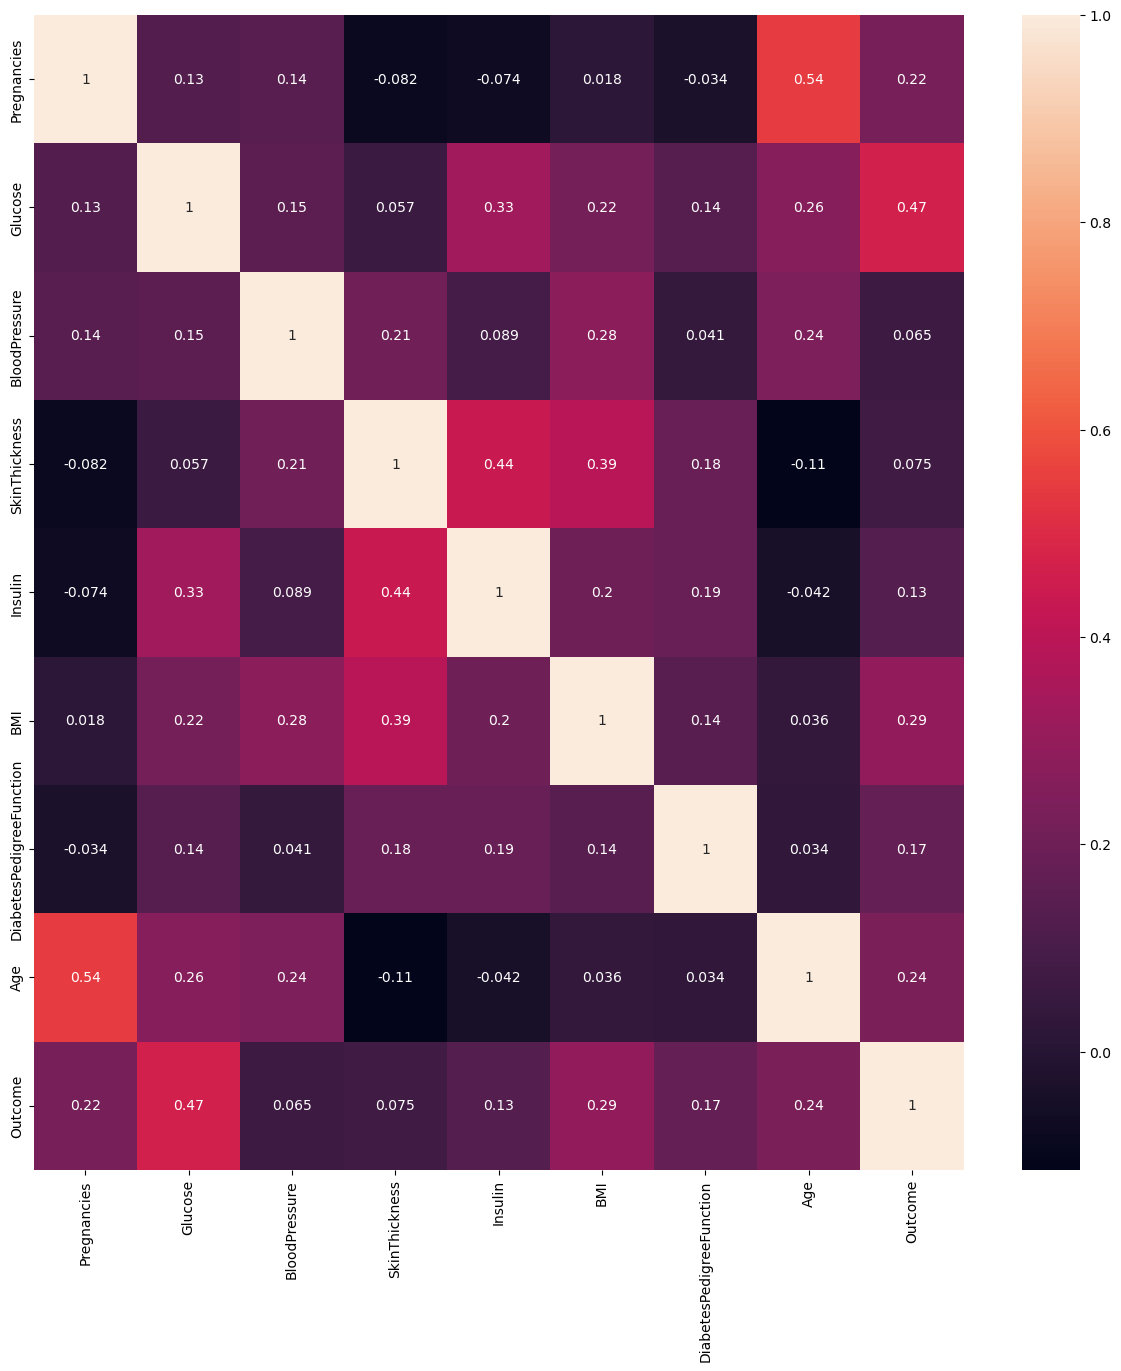

In [19]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(dataframe.corr(), annot=True)
plt.savefig('correlation-coefficient.jpg')
plt.show()

### Descriptive Statistics of the given data

In [20]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Data Imputation**

Here for data imputation one need to have knowledge of 
- Symmetric distribution
- Non-Symmetric distribution
- Left skewed
- Right skewed

So that appropriate mean mode median can be selected for imputation

## Data Imputation: When to Use **Mean**, **Mode**, and **Median**

Data imputation is the process of replacing missing values in a dataset with substituted values to maintain data integrity and enable meaningful analysis. The choice of imputation method—whether **mean**, **median**, or **mode**—depends on several factors, including the **type of data**, **distribution of the data**, and the **nature of missing values**.

Here’s a detailed explanation of when to use each imputation method:

---

### 1. **Mean Imputation**

- **Definition**: Mean imputation replaces missing values with the **average** (mean) of the available data for that feature.
  
- **When to Use**:
  - **Continuous Data**: Mean imputation is suitable for **continuous numerical data** (e.g., age, income, height, weight).
  - **Normally Distributed Data**: It works well when the data follows a **normal distribution** (i.e., the data is symmetrically distributed with no extreme outliers).
  - **Low Percentage of Missing Data**: Use mean imputation when the percentage of missing values is low (typically <5%).

- **When Not to Use**:
  - **Skewed Data**: For data that is skewed or has extreme outliers, the mean can be significantly affected, leading to distorted imputation.
  - **Categorical Data**: Mean imputation is not suitable for **categorical data** because mean calculation is only valid for numerical data.

#### Example Use Case:
  - In a dataset of **employees’ salaries**, you can impute missing salary values using the mean of the available salary data if the distribution is normal.

```python
mean_value = df['salary'].mean()
df['salary'].fillna(mean_value, inplace=True)
```

---

### 2. **Median Imputation**

- **Definition**: Median imputation replaces missing values with the **median** (the middle value) of the available data for that feature.
  
- **When to Use**:
  - **Continuous Data**: Like mean imputation, median imputation is suitable for **continuous numerical data**.
  - **Skewed Data**: Median imputation is more appropriate when the data is **skewed** or contains **outliers**, as the median is robust and not affected by extreme values.
  - **Non-Normal Distributions**: Use median imputation when the distribution of the data is **non-normal** (e.g., skewed left or right).

- **When Not to Use**:
  - **Categorical Data**: Median imputation is not suitable for **categorical data** for the same reasons as mean imputation.
  - **Small Datasets**: If the dataset is small, the median might not adequately capture the central tendency of the data.

#### Example Use Case:
  - For a dataset of **housing prices** where a few extremely high prices skew the distribution, median imputation is a better choice to replace missing housing prices.

```python
median_value = df['house_price'].median()
df['house_price'].fillna(median_value, inplace=True)
```

---

### 3. **Mode Imputation**

- **Definition**: Mode imputation replaces missing values with the **mode** (the most frequent value) of the available data for that feature.

- **When to Use**:
  - **Categorical Data**: Mode imputation is suitable for **categorical data** (e.g., gender, occupation, product type) because the mode represents the most common category or class.
  - **Ordinal Data**: For **ordinal data** (e.g., education level, satisfaction rating), mode imputation is also appropriate because it maintains the most frequent category.
  - **Nominal Data**: Mode imputation works well with **nominal data** (categories without a specific order, like color or product type).
  - **High Frequency Categories**: When a category appears frequently in the dataset, using the mode helps maintain consistency with the existing distribution.

- **When Not to Use**:
  - **Continuous Data**: Mode imputation is not suitable for continuous numerical data, as there is no clear "most frequent value" in continuous data.
  - **Multiple Modes**: If there are multiple modes (bimodal or multimodal data), choosing the right mode for imputation can be tricky and might not accurately reflect the true distribution.

#### Example Use Case:
  - In a dataset of **customer survey responses** where the question asks for the most frequent category (e.g., "satisfied", "neutral", "dissatisfied"), mode imputation is appropriate for missing responses.

```python
mode_value = df['customer_satisfaction'].mode()[0]
df['customer_satisfaction'].fillna(mode_value, inplace=True)
```

---

### **Summary of When to Use Each Method**:

| **Imputation Method** | **Best for Data Type**         | **When to Use**                                                                                  | **When to Avoid**                                                |
|-----------------------|-------------------------------|---------------------------------------------------------------------------------------------------|-----------------------------------------------------------------|
| **Mean Imputation**    | Continuous (Numerical)        | - Normal distribution <br>- Low percentage of missing values                                      | - Skewed data <br>- Data with outliers <br>- Categorical data   |
| **Median Imputation**  | Continuous (Numerical)        | - Skewed data <br>- Data with outliers <br>- Non-normal distribution                              | - Small datasets <br>- Categorical data                         |
| **Mode Imputation**    | Categorical & Ordinal         | - Categorical data <br>- Ordinal data <br>- High frequency categories                             | - Continuous data <br>- Multiple modes present                  |

### Considerations for Choosing the Right Imputation Method:

1. **Type of Data**:
   - **Numerical Data**: Use **mean** or **median** depending on the distribution.
   - **Categorical Data**: Use **mode**.

2. **Distribution**:
   - **Normal Distribution**: Mean imputation is effective.
   - **Skewed Distribution/Outliers**: Median imputation is better due to robustness.

3. **Percentage of Missing Data**:
   - **Low Percentage**: Mean or median imputation can work well.
   - **High Percentage**: Use caution; too much imputation can distort the dataset.

4. **Dataset Size**:
   - **Large Datasets**: Median and mean imputation work well.
   - **Small Datasets**: Mode may be more effective for categorical data, as other methods might distort the limited information.

Choosing the right imputation method requires a thorough understanding of your dataset and the nature of the missing data. Each method has its strengths and limitations depending on the context.

/var/folders/8h/zprf7hjs319_78816p34b90c0000gn/T/ipykernel_13807/3257203740.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.Pregnancies)


<Axes: xlabel='Pregnancies', ylabel='Density'>

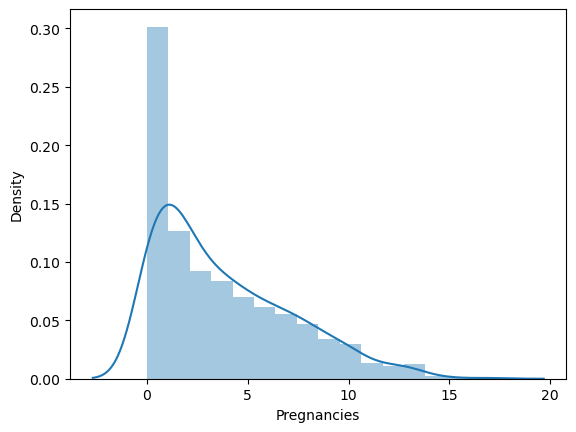

In [21]:
# Pregnancies -> Median
sns.distplot(dataframe.Pregnancies)

<Axes: xlabel='Pregnancies', ylabel='Count'>

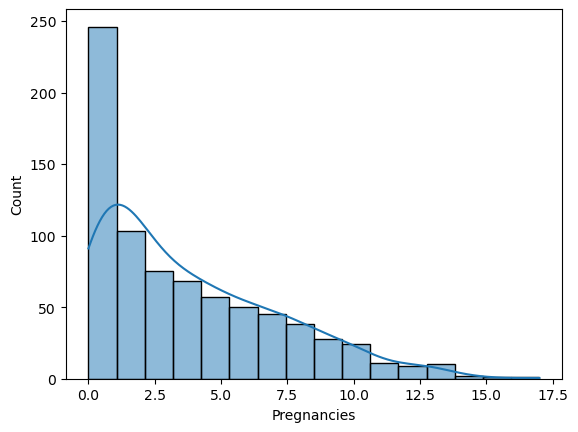

In [22]:
sns.histplot(dataframe.Pregnancies, kde=True)

/var/folders/8h/zprf7hjs319_78816p34b90c0000gn/T/ipykernel_13807/891648068.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.BloodPressure)


<Axes: xlabel='BloodPressure', ylabel='Density'>

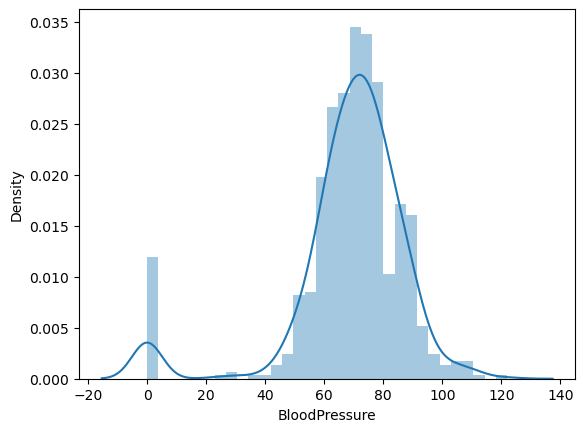

In [23]:
## BP -> Mean
sns.distplot(dataframe.BloodPressure)

/var/folders/8h/zprf7hjs319_78816p34b90c0000gn/T/ipykernel_13807/2576152247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.Insulin)


<Axes: xlabel='Insulin', ylabel='Density'>

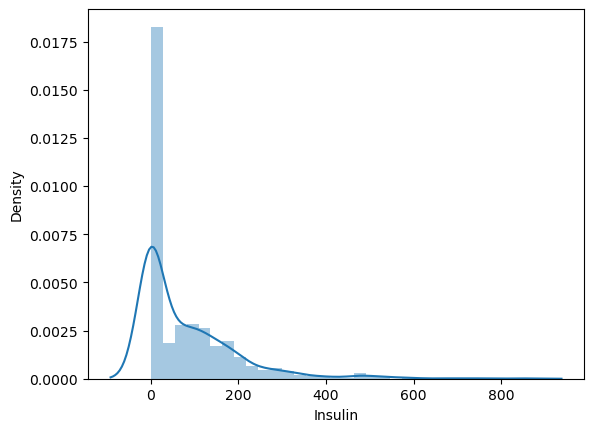

In [24]:
# Insulin -> Median
sns.distplot(dataframe.Insulin)

In [25]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
## Insuline -> Right skewed distribution
dataframe['Insulin'] = dataframe['Insulin'].replace(0, dataframe['Insulin'].median())

/var/folders/8h/zprf7hjs319_78816p34b90c0000gn/T/ipykernel_13807/2230432677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.Glucose)


<Axes: xlabel='Glucose', ylabel='Density'>

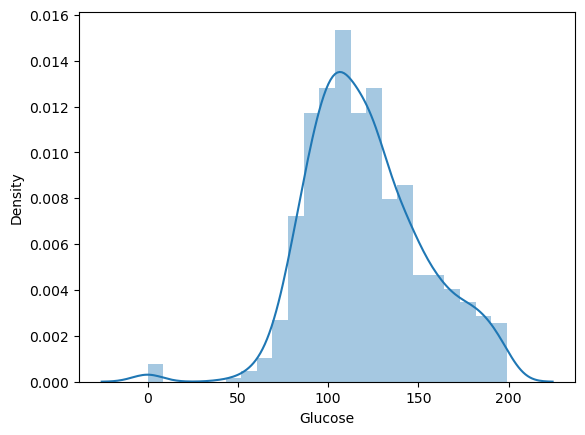

In [27]:
sns.distplot(dataframe.Glucose)

/var/folders/8h/zprf7hjs319_78816p34b90c0000gn/T/ipykernel_13807/2520980793.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.BMI)


<Axes: xlabel='BMI', ylabel='Density'>

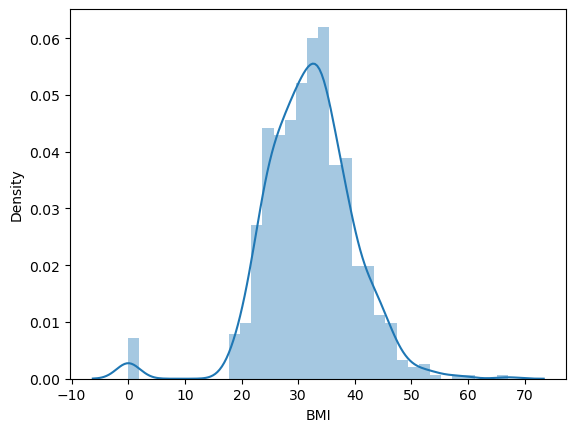

In [28]:
sns.distplot(dataframe.BMI)

/var/folders/8h/zprf7hjs319_78816p34b90c0000gn/T/ipykernel_13807/3861253045.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.SkinThickness)


<Axes: xlabel='SkinThickness', ylabel='Density'>

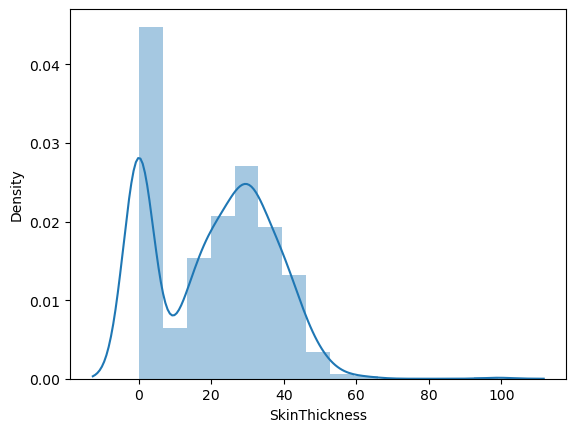

In [29]:
sns.distplot(dataframe.SkinThickness)

/var/folders/8h/zprf7hjs319_78816p34b90c0000gn/T/ipykernel_13807/2642758734.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.DiabetesPedigreeFunction)


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

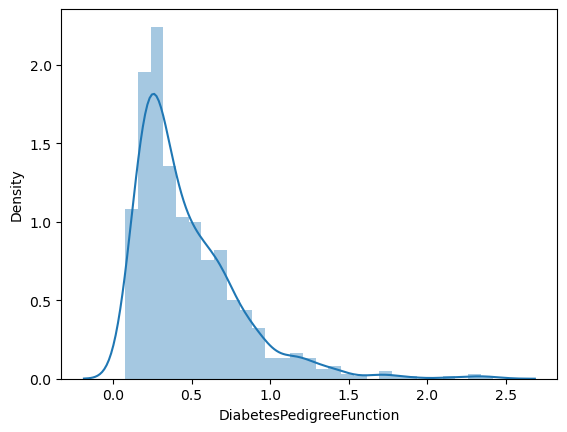

In [30]:
sns.distplot(dataframe.DiabetesPedigreeFunction)

/var/folders/8h/zprf7hjs319_78816p34b90c0000gn/T/ipykernel_13807/2691430987.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.Age)


<Axes: xlabel='Age', ylabel='Density'>

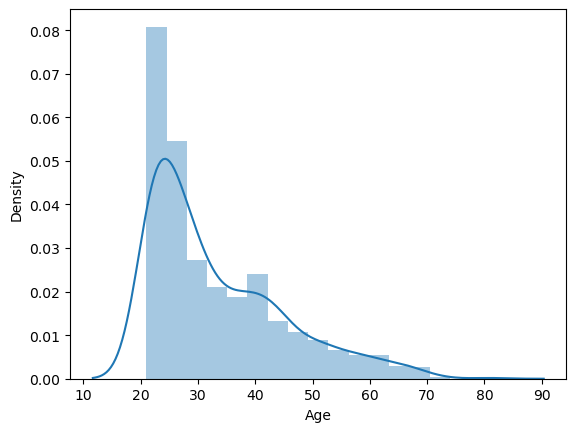

In [31]:
sns.distplot(dataframe.Age)

In [32]:
dataframe['Pregnancies'] = dataframe['Pregnancies'].replace(0, dataframe['Pregnancies'].median())
dataframe['Glucose'] = dataframe['Glucose'].replace(0, dataframe['Glucose'].mean())
dataframe['BloodPressure'] = dataframe['BloodPressure'].replace(0, dataframe['BloodPressure'].mean())
dataframe['SkinThickness'] = dataframe['SkinThickness'].replace(0, dataframe['SkinThickness'].median())
dataframe['BMI'] = dataframe['BMI'].replace(0, dataframe['BMI'].mean())
dataframe['DiabetesPedigreeFunction'] = dataframe['DiabetesPedigreeFunction'].replace(0, dataframe['DiabetesPedigreeFunction'].median())
dataframe['Age'] = dataframe['Age'].replace(0, dataframe['Age'].median())

In [33]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.5,33.600000,0.627,50,1
1,1,85.0,66.000000,29,30.5,26.600000,0.351,31,0
2,8,183.0,64.000000,23,30.5,23.300000,0.672,32,1
3,1,89.0,66.000000,23,94.0,28.100000,0.167,21,0
4,3,137.0,40.000000,35,168.0,43.100000,2.288,33,1
5,5,116.0,74.000000,23,30.5,25.600000,0.201,30,0
6,3,78.0,50.000000,32,88.0,31.000000,0.248,26,1
7,10,115.0,69.105469,23,30.5,35.300000,0.134,29,0
8,2,197.0,70.000000,45,543.0,30.500000,0.158,53,1
9,8,125.0,96.000000,23,30.5,31.992578,0.232,54,1




*   Descriptive Statistics and it's significance
*   Correlation Coefficient and it's significance
*   Types of Distribution and it's significance
*   Median is more robust to outliers and why
*   Data Imputation via Mean and Median(Numeric Data) => Symmetric -> Mean and Skewed -> Median, Categorical Data => Mode

In [ ]:
## X -> input features y -> target value
X = dataframe.drop(columns='Outcome', axis=1)
y = dataframe['Outcome']

Outlier Detection -> Box Plot

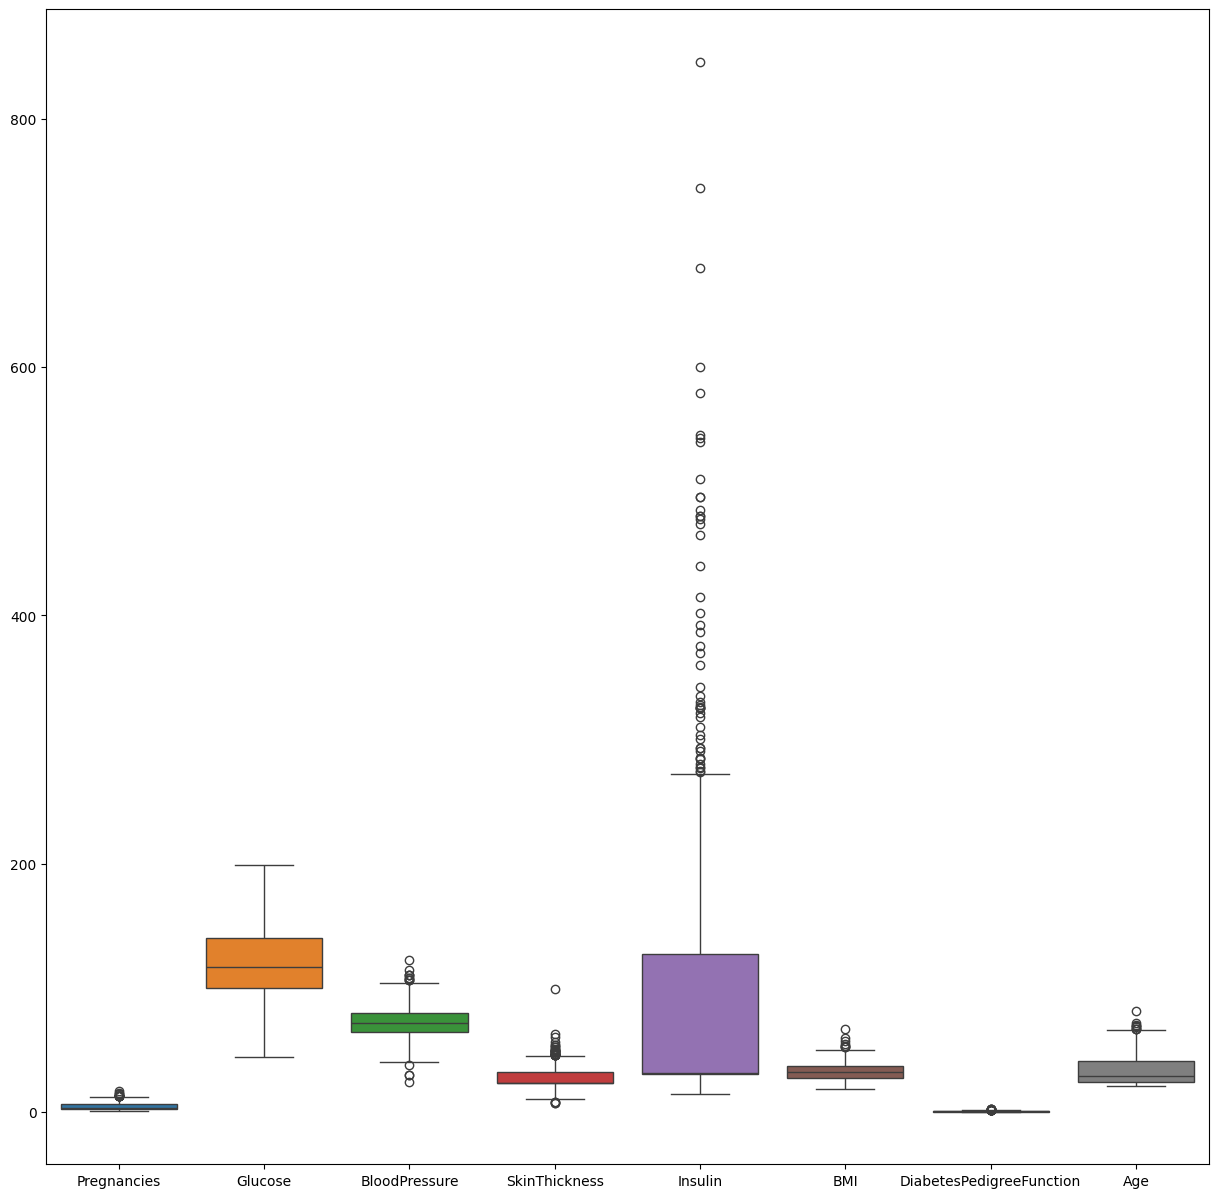

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = X, ax=ax)
plt.savefig('boxPlot.jpg')

In [ ]:
X.shape

(768, 8)

In [ ]:
y.shape

(768,)

In [ ]:
# Removing outliers for all required columns
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X_outlier_detection=X
y_outlier_detection=y
for col in cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (X[col] >= lower_bound) & (X[col] <= upper_bound)
    X_outlier_detection = X_outlier_detection_total[mask]
    y_outlier_detection = y_outlier_detection_total[mask]
    for idx, name in enumerate(mask.value_counts().index.tolist()):
     print(f"for {col},{name}->{mask.value_counts()[idx]}")

Standardization

Standard Normal Form -> Mean = 0 and standard deviation = 1

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_outlier_detection)

In [ ]:
X_scaled

array([[ 0.57322173,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-1.0797999 , -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23443039,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.2426174 , -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-1.0797999 ,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-1.0797999 , -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

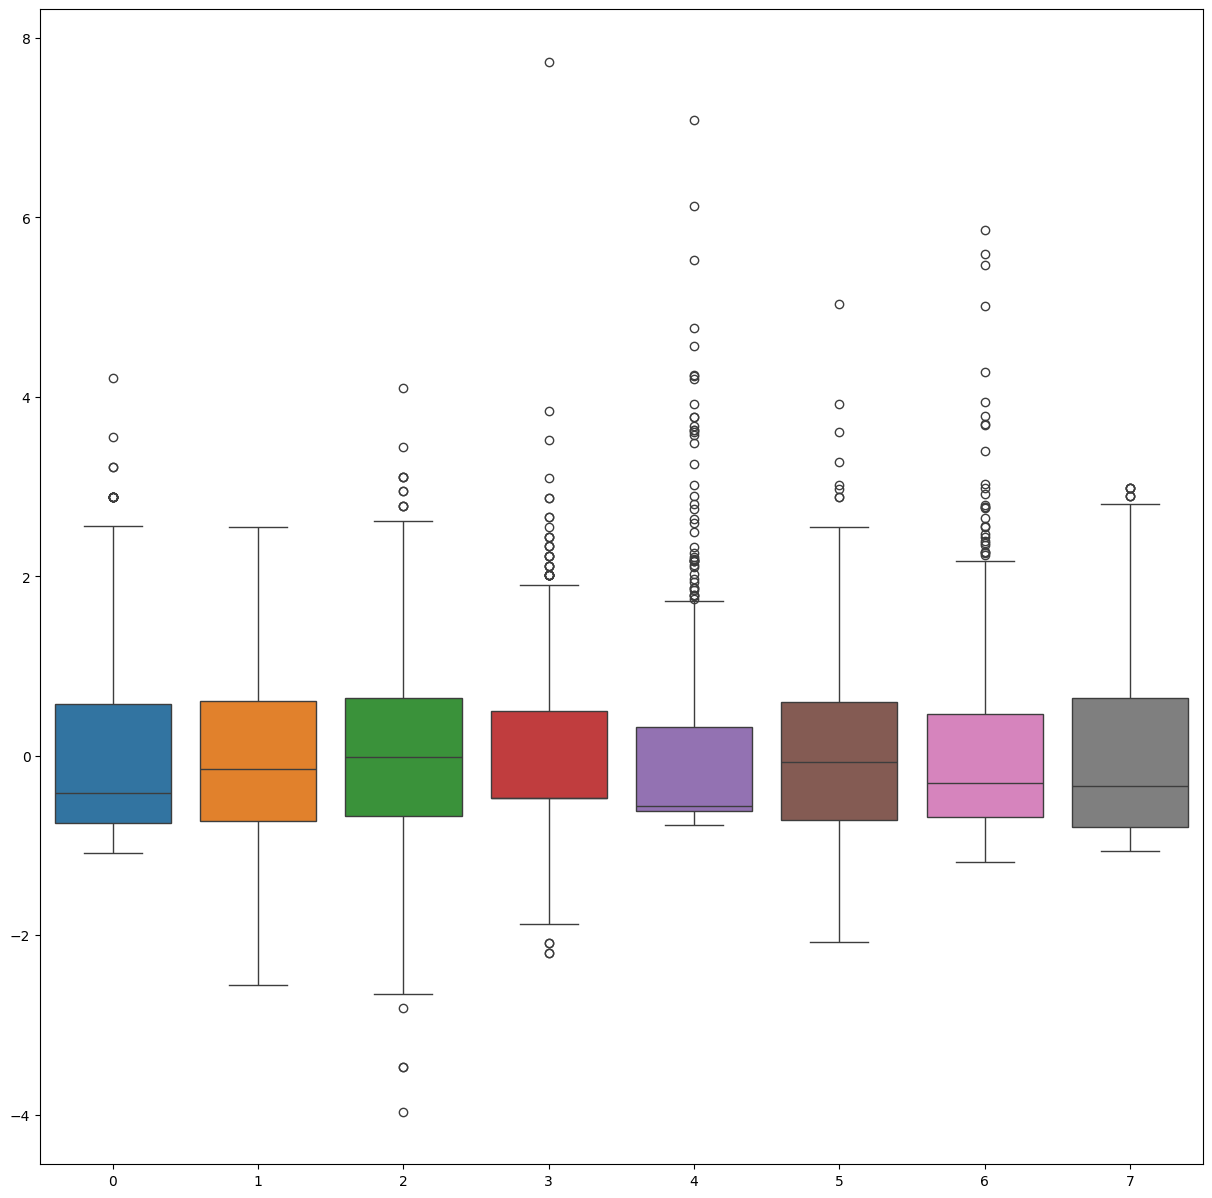

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = X_scaled, ax=ax)
plt.savefig('boxPlot.jpg')

In [ ]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
type(X_scaled)

numpy.ndarray

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=cols)
X_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,-3.978665e-17,-3.042508e-17,-1.509552e-16,-4.329724e-17,5.546727e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.558042e+00,-3.968588e+00,-2.200901e+00,-7.684941e-01,-2.081038e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.286101e-01,-6.755847e-01,-4.729631e-01,-6.126688e-01,-7.125819e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.517621e-01,-1.698412e-02,-4.729631e-01,-5.607270e-01,-7.202795e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.063810e-01,6.416165e-01,4.990017e-01,3.222827e-01,5.976421e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551183e+00,4.099270e+00,7.734740e+00,7.088876e+00,5.037846e+00,5.864467e+00,2.988962e+00





*   Approach 2 of quantiles to remove the outliers
*   Handling of imbalanced data




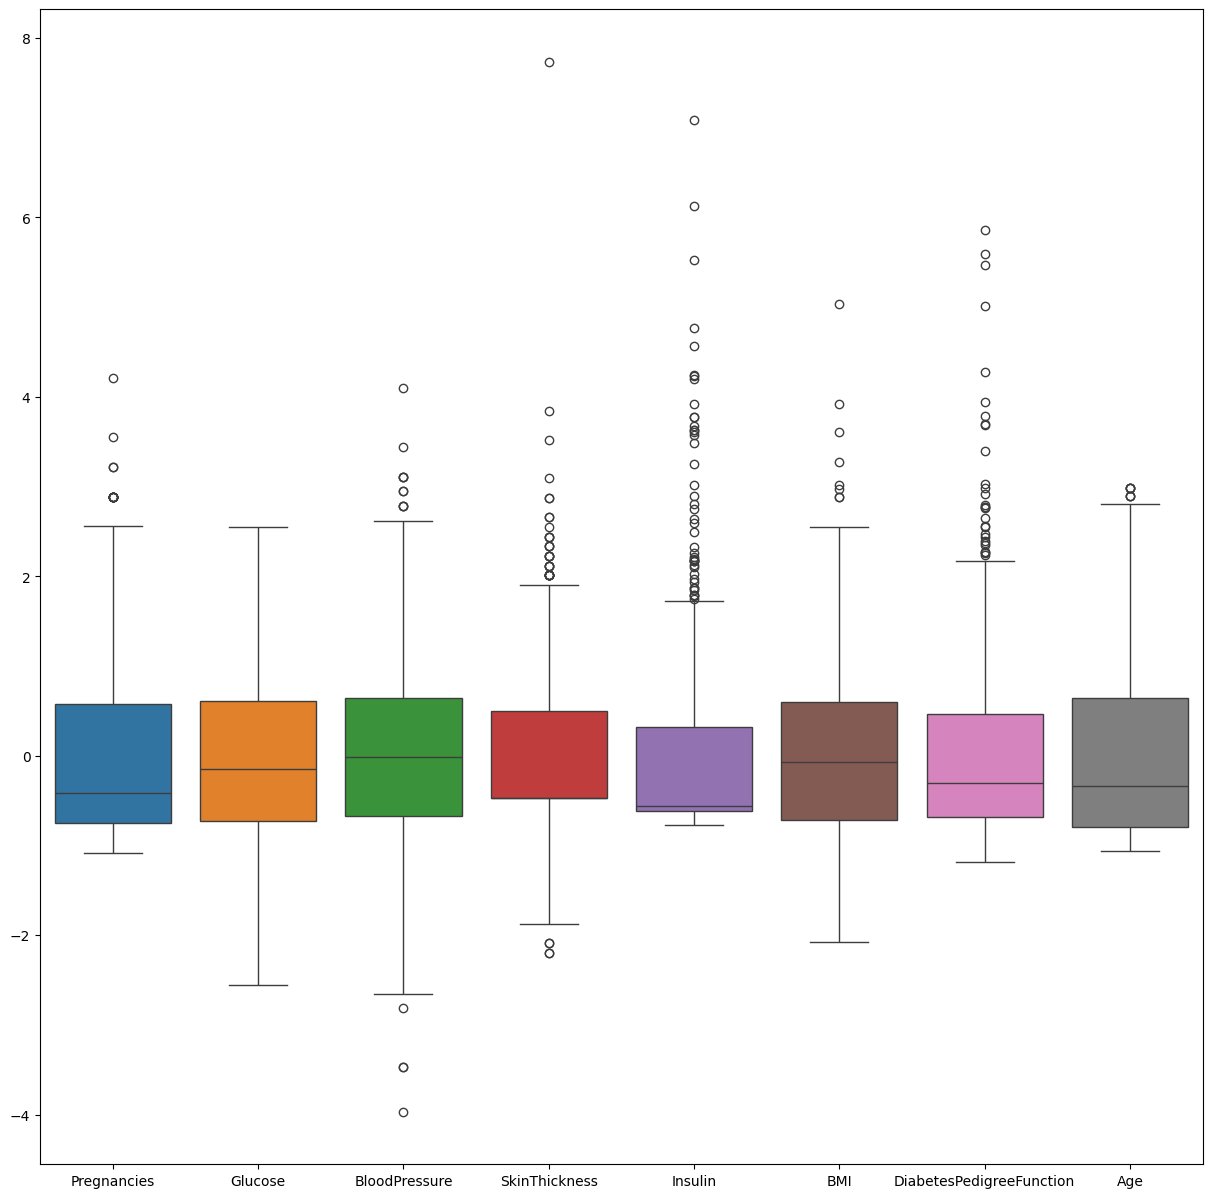

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = X_scaled, ax=ax)
plt.savefig('boxPlot.jpg')

In [ ]:
y_outlier_detection.shape

(759,)

In [ ]:
y_outlier_detection.value_counts()

Outcome
0    493
1    266
Name: count, dtype: int64

Concluding:


*  Detection of the outliers
*  Normalization via StandardScaler Form & Why it is important(reduce the biasness in the model)



Approach 2: Quantiles

In [ ]:
X_scaled.reset_index(drop=True, inplace=True)
y_outlier_detection.reset_index(drop=True, inplace=True)

In [ ]:
q = X_scaled['Insulin'].quantile(.95)
mask = X_scaled['Insulin'] < q
dataNew = X_scaled[mask]
y_outlier_detection = y_outlier_detection[mask]

In [ ]:
dataNew.shape

(721, 8)

In [ ]:
y_outlier_detection.shape

(721,)

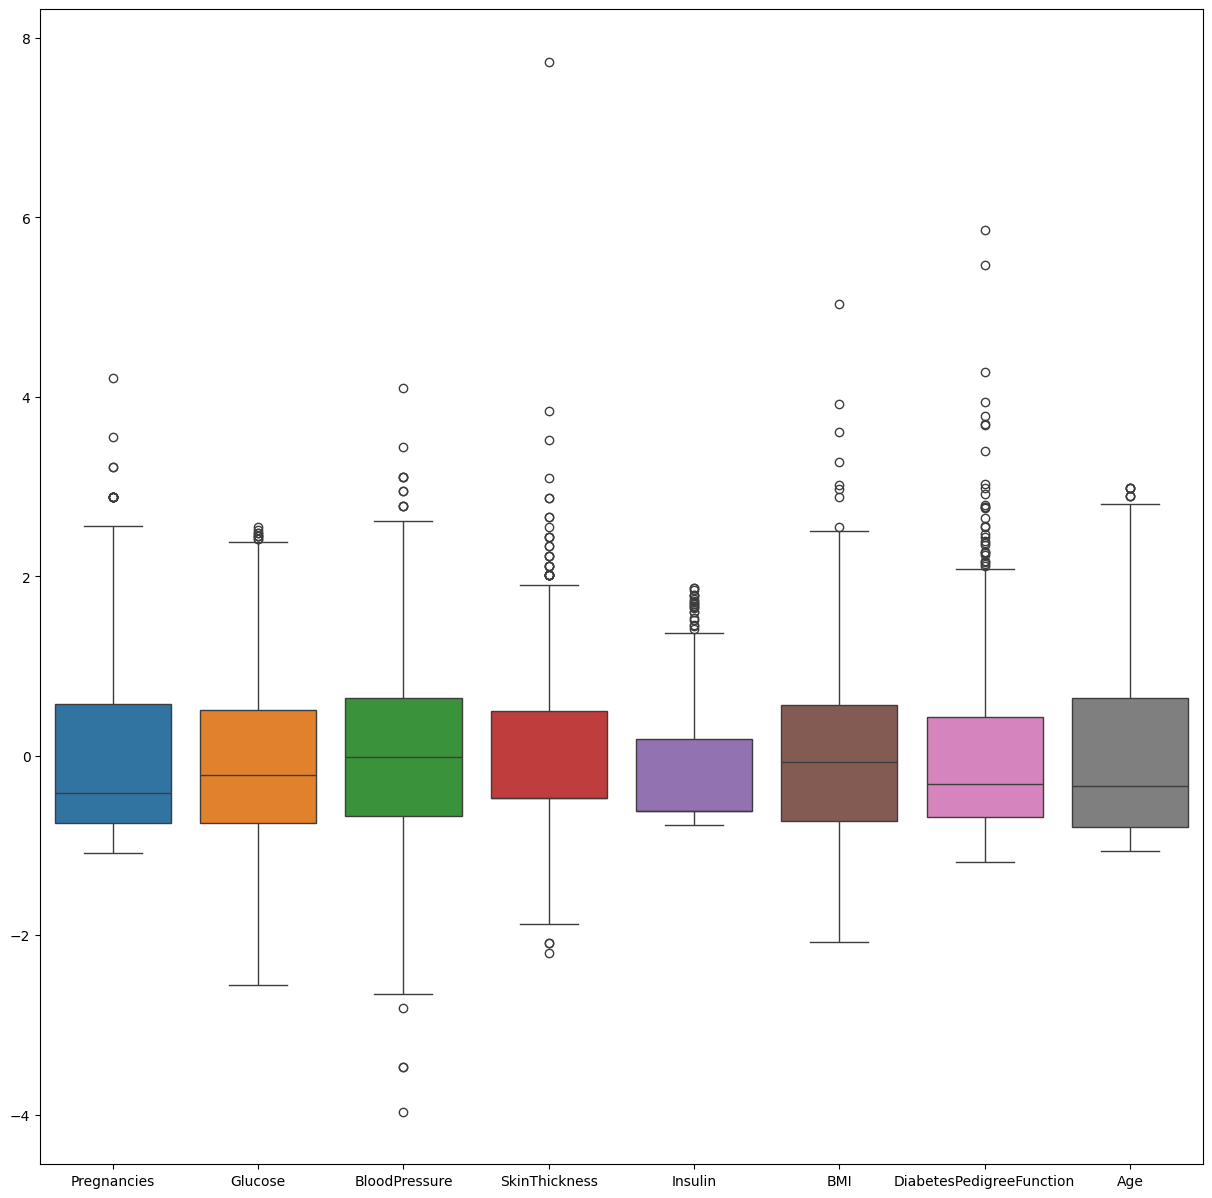

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = dataNew, ax=ax)
plt.savefig('boxPlot.jpg')

Model Training

Splitting of data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataNew, y_outlier_detection, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(483, 8)

In [ ]:
X_test.shape

(238, 8)

Data Imbalancing



*   Oversampling : Minority Class and increase that number to the majority class
*   Undersampling : Majority class and decrease that number to the minority class
*   SMOTE : Synthetic data and increase the number of samples to the majority class






In [ ]:
y_train.value_counts()

Outcome
0    318
1    165
Name: count, dtype: int64

SMOTE Technique

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check resampled class distribution
print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())


Resampled class distribution:
Outcome
0    318
1    318
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()
classification.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

Model Predictions

In [ ]:
y_predictions = classification.predict(X_test)
print(y_predictions)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1]


Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predictions)

0.7478991596638656

Healthcare: Recall is very important metric

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Non-Diabetic', 'Diabetic']
print(classification_report(y_test, y_predictions, target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetic       0.85      0.76      0.80       159
    Diabetic       0.60      0.72      0.66        79

    accuracy                           0.75       238
   macro avg       0.72      0.74      0.73       238
weighted avg       0.76      0.75      0.75       238



In [ ]:
import pickle
pickle.dump(classification, open("classification_model.pkl", "wb"))

In [ ]:
classification_model = pickle.load(open("classification_model.pkl", "rb"))
classification_model.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

Model Training: KNNClassifier Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

Model Prediction

In [ ]:
y_prediction_knn = knn.predict(X_test)
y_prediction_knn

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_prediction_knn))

Confusion Matrix
[[103  56]
 [ 19  60]]


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_prediction_knn))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.65      0.73       159
           1       0.52      0.76      0.62        79

    accuracy                           0.68       238
   macro avg       0.68      0.70      0.67       238
weighted avg       0.74      0.68      0.69       238



Data Modeling: Implementation of Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_gaussian_naive_bayes = GaussianNB()
model_gaussian_naive_bayes.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [ ]:
y_predict_gaussian_naive_bayes = model_gaussian_naive_bayes.predict(X_test)
print(y_predict_gaussian_naive_bayes)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0
 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0]


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predict_gaussian_naive_bayes))

Confusion Matrix
[[119  40]
 [ 27  52]]


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_predict_gaussian_naive_bayes))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       159
           1       0.57      0.66      0.61        79

    accuracy                           0.72       238
   macro avg       0.69      0.70      0.69       238
weighted avg       0.73      0.72      0.72       238



In [ ]:
accuracy_score(y_test, y_predict_gaussian_naive_bayes)

0.7184873949579832